Goal:

Find a pattern in the top influencer's stats

Results:

No patterns exist. The plots show no relations/trends and the elbow curves shows that the elbow is at clusters = 1

In [484]:
### Data Preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

dataframe = pd.read_csv("top_insta_influencers_data.csv")
dataframe.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [485]:
# Clear useless columns
dataframe = dataframe.drop(["channel_info", "60_day_eng_rate"], axis = 1)
dataframe.head()

,rank,influence_score,posts,followers,avg_likes,new_post_avg_like,total_likes,country
0,1,92,3.3k,475.8m,8.7m,6.5m,29.0b,Spain
1,2,91,6.9k,366.2m,8.3m,5.9m,57.4b,United States
2,3,90,0.89k,357.3m,6.8m,4.4m,6.0b,NaN
3,4,93,1.8k,342.7m,6.2m,3.3m,11.5b,United States
4,5,91,6.8k,334.1m,1.9m,665.3k,12.5b,United States


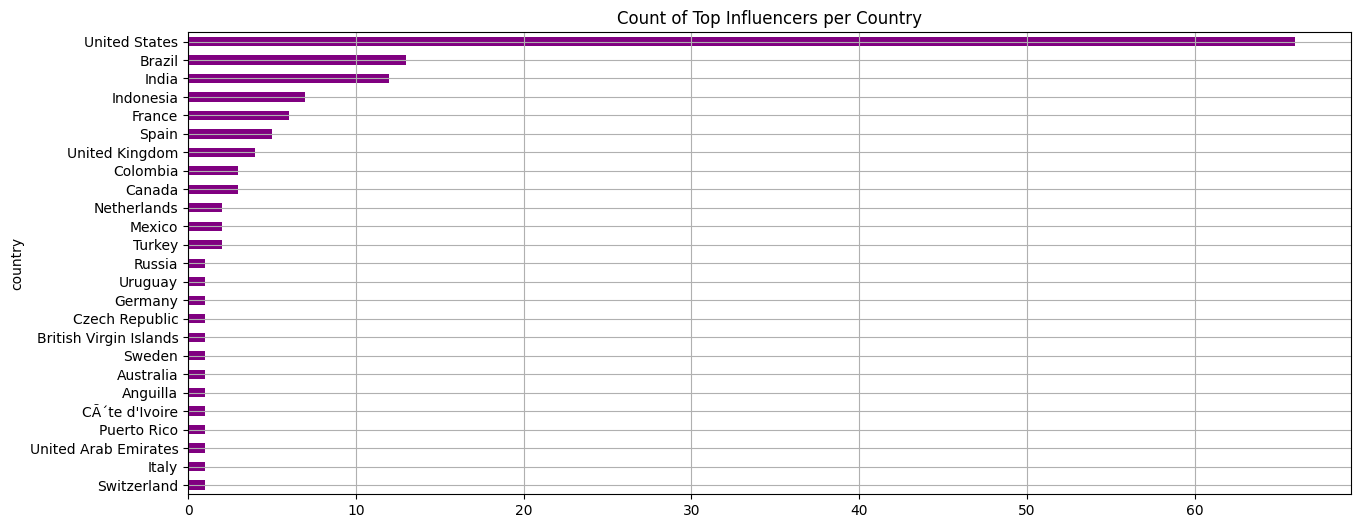

In [486]:
values = dataframe['country'].value_counts()
values = values.sort_values(ascending=True)
values.plot(kind='barh', title='Count of Top Influencers per Country', figsize=(15,6), color='purple', grid=True)
plt.show()

dataframe = dataframe.drop('country', axis = 1)
# NOTE: I decided to drop the country columns, since obiously most records belong to the US, so i dont want this to affect the data

In [487]:
dataframe.head()

,rank,influence_score,posts,followers,avg_likes,new_post_avg_like,total_likes
0,1,92,3.3k,475.8m,8.7m,6.5m,29.0b
1,2,91,6.9k,366.2m,8.3m,5.9m,57.4b
2,3,90,0.89k,357.3m,6.8m,4.4m,6.0b
3,4,93,1.8k,342.7m,6.2m,3.3m,11.5b
4,5,91,6.8k,334.1m,1.9m,665.3k,12.5b


In [488]:
# Adjust string inside the numerical fields
def adjust_counts(number, letter):
  if len(number) > 0:
    letter = letter.strip()
    number = float(number)
    if letter == 'b':
      return number * 1000000000
    elif letter == 'm':
      return number * 1000000
    elif letter == 'k':
      return number * 1000
  else:
    return float(letter.strip())

dataframe['posts'] = dataframe['posts'].apply(lambda x: adjust_counts(number=x[:-1], letter=x[-1]))
dataframe['followers'] = dataframe['followers'].apply(lambda x: adjust_counts(number=x[:-1], letter=x[-1]))
dataframe['avg_likes'] = dataframe['avg_likes'].apply(lambda x: adjust_counts(number=x[:-1], letter=x[-1]))
dataframe['new_post_avg_like'] = dataframe['new_post_avg_like'].apply(lambda x: adjust_counts(number=x[:-1], letter=x[-1]))
dataframe['total_likes'] = dataframe['total_likes'].apply(lambda x: adjust_counts(number=x[:-1], letter=x[-1]))

In [489]:
dataframe.head()

,rank,influence_score,posts,followers,avg_likes,new_post_avg_like,total_likes
0,1,92,3300.0,475800000.0,8700000.0,6500000.0,2.900000e+10
1,2,91,6900.0,366200000.0,8300000.0,5900000.0,5.740000e+10
2,3,90,890.0,357300000.0,6800000.0,4400000.0,6.000000e+09
3,4,93,1800.0,342700000.0,6200000.0,3300000.0,1.150000e+10
4,5,91,6800.0,334100000.0,1900000.0,665300.0,1.250000e+10


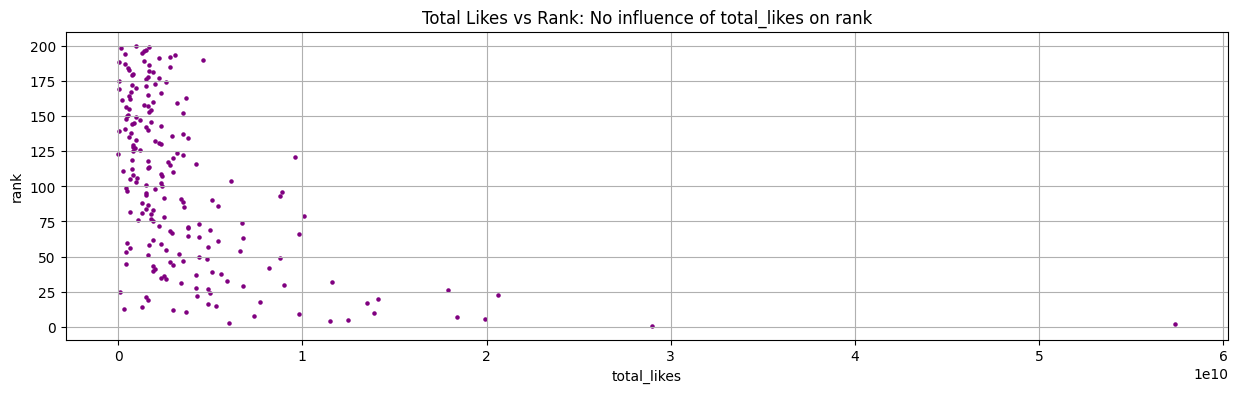

In [490]:
dataframe.plot(x='total_likes', y='rank', kind='scatter', s=5, color='purple', figsize=(15,4), grid=True,
               title='Total Likes vs Rank: No influence of total_likes on rank')
plt.show()

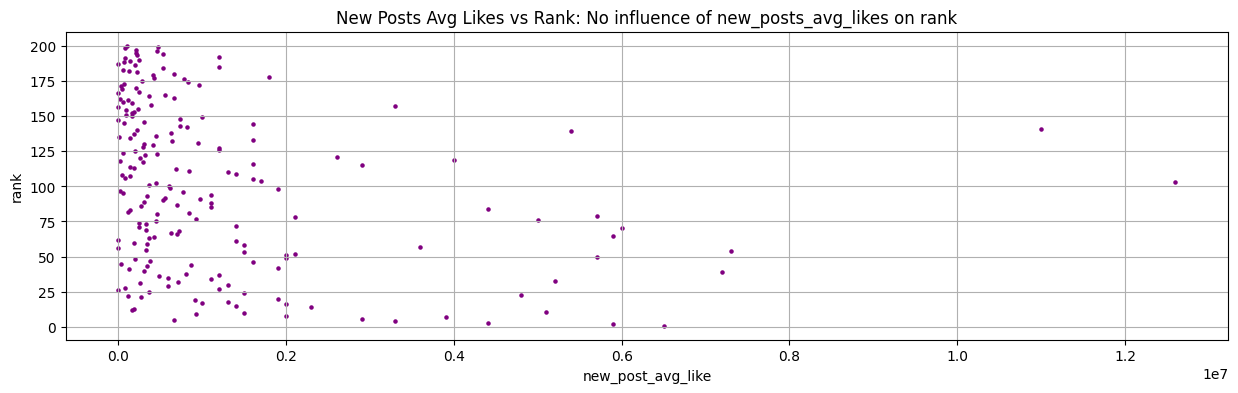

In [491]:
dataframe.plot(x='new_post_avg_like', y='rank', kind='scatter', s=5, color='purple', figsize=(15,4), grid=True,
               title='New Posts Avg Likes vs Rank: No influence of new_posts_avg_likes on rank')
plt.show()

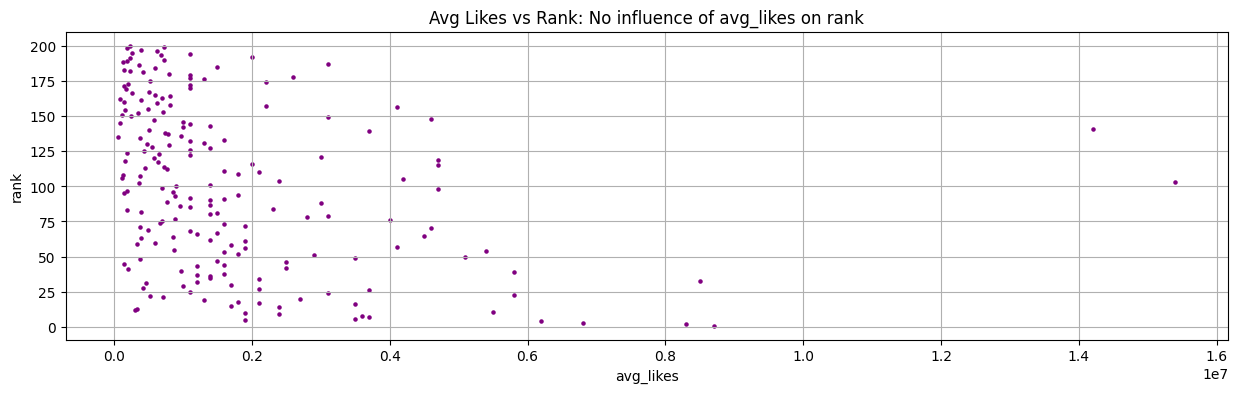

In [492]:
dataframe.plot(x='avg_likes', y='rank', kind='scatter', s=5, color='purple', figsize=(15,4), grid=True,
               title='Avg Likes vs Rank: No influence of avg_likes on rank')
plt.show()

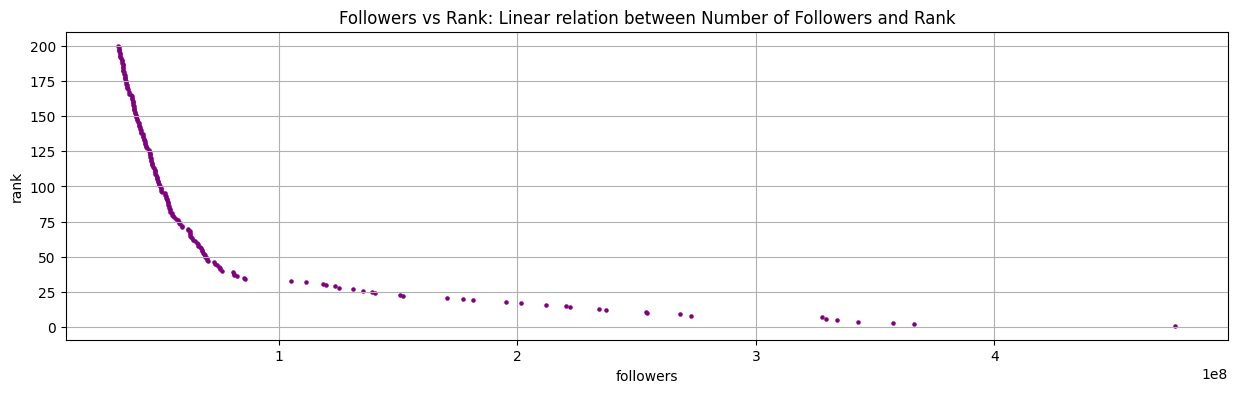

In [493]:
dataframe.plot(x='followers', y='rank', kind='scatter', s=5, color='purple', figsize=(15,4), grid=True,
               title='Followers vs Rank: Linear relation between Number of Followers and Rank')
plt.show()

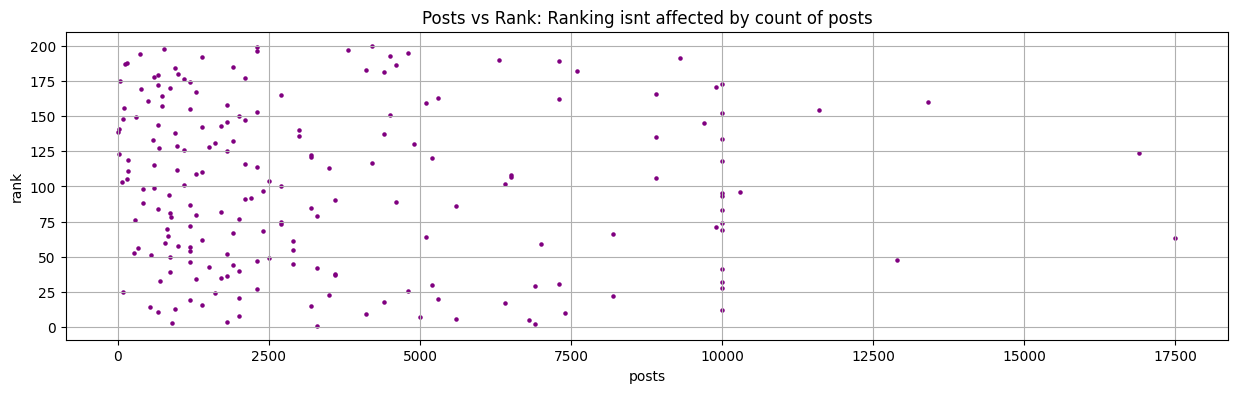

In [494]:
dataframe.plot(x='posts', y='rank', kind='scatter', s=5, color='purple', figsize=(15,4), grid=True,
               title='Posts vs Rank: Ranking isnt affected by count of posts')
plt.show()

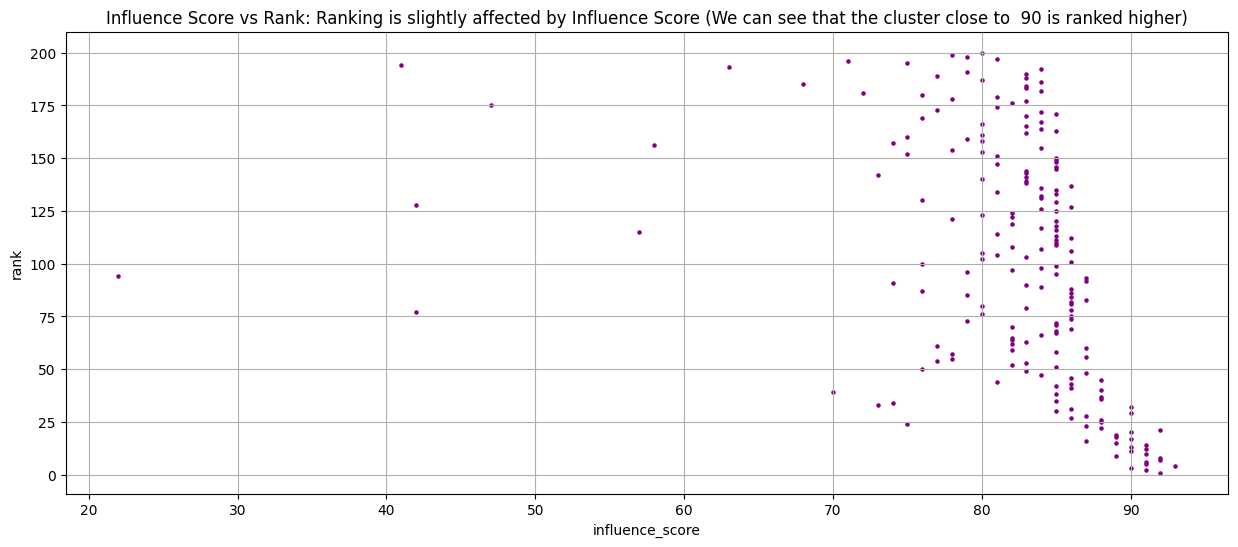

In [495]:
dataframe.plot(x='influence_score', y='rank', kind='scatter', s=5, color='purple', figsize=(15,6), grid=True,
               title='Influence Score vs Rank: Ranking is slightly affected by Influence Score (We can see that the cluster close to  90 is ranked higher)')
plt.show()

In [496]:
# Normalization
max_values = dataframe.max()
features = dataframe / max_values

In [497]:
from sklearn.cluster import KMeans

# Calculate the wcss and show elbow curve
def calculate_wcss(features):
  wcss = []
  for i in range(1, 11):
    kmeans = KMeans( n_clusters = i, init = "k-means++", )
    kmeans.fit(features)
    wcss.append(kmeans.inertia_) # wcss
  
  plt.figure(figsize=(15, 3))
  plt.plot(wcss)
  plt.xlabel('Clusters')
  plt.ylabel('WCSS')
  plt.show()

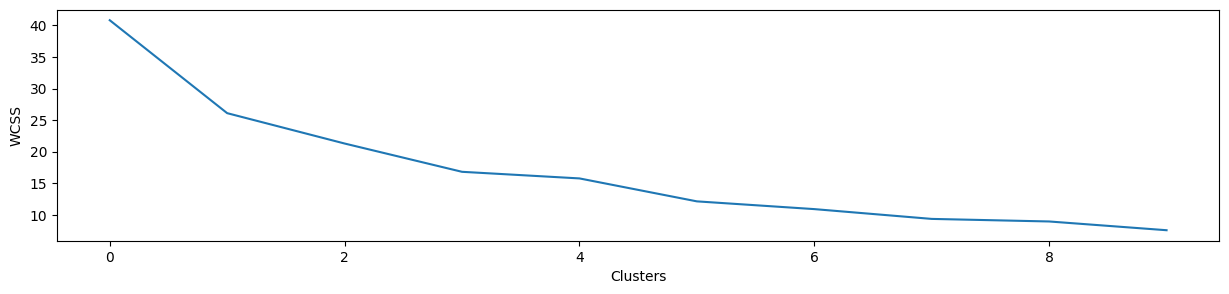

In [498]:
# Plot ekbow curve
calculate_wcss(features)

In [499]:
# Train and Predict a new class label
kmeans = KMeans(n_clusters=4, init='k-means++')
class_label = kmeans.fit_predict(features)

# This list is used in plotting the curves and clusters
colors = ['orange', 'purple', 'black', 'blue', 'red', ]

In [500]:
# Create a combined dataframe with our new clusters
columns = list(features.columns)
columns.append('clusters')
class_label = pd.DataFrame(class_label, columns=['clusters'])

# Add clusters column to original dataframe
dataframe = pd.concat([dataframe, class_label], axis=1)
dataframe

,rank,influence_score,posts,followers,avg_likes,new_post_avg_like,total_likes,clusters
0,1,92,3300.0,475800000.0,8700000.0,6500000.0,2.900000e+10,1
1,2,91,6900.0,366200000.0,8300000.0,5900000.0,5.740000e+10,1
2,3,90,890.0,357300000.0,6800000.0,4400000.0,6.000000e+09,1
3,4,93,1800.0,342700000.0,6200000.0,3300000.0,1.150000e+10,1
4,5,91,6800.0,334100000.0,1900000.0,665300.0,1.250000e+10,1
...,...,...,...,...,...,...,...,...
194,196,71,2300.0,33200000.0,623800.0,464700.0,1.400000e+09,2
195,197,81,3800.0,33200000.0,390400.0,208000.0,1.500000e+09,2
196,198,79,770.0,33200000.0,193300.0,82600.0,1.492000e+08,3
197,199,78,2300.0,33000000.0,719600.0,467700.0,1.700000e+09,2


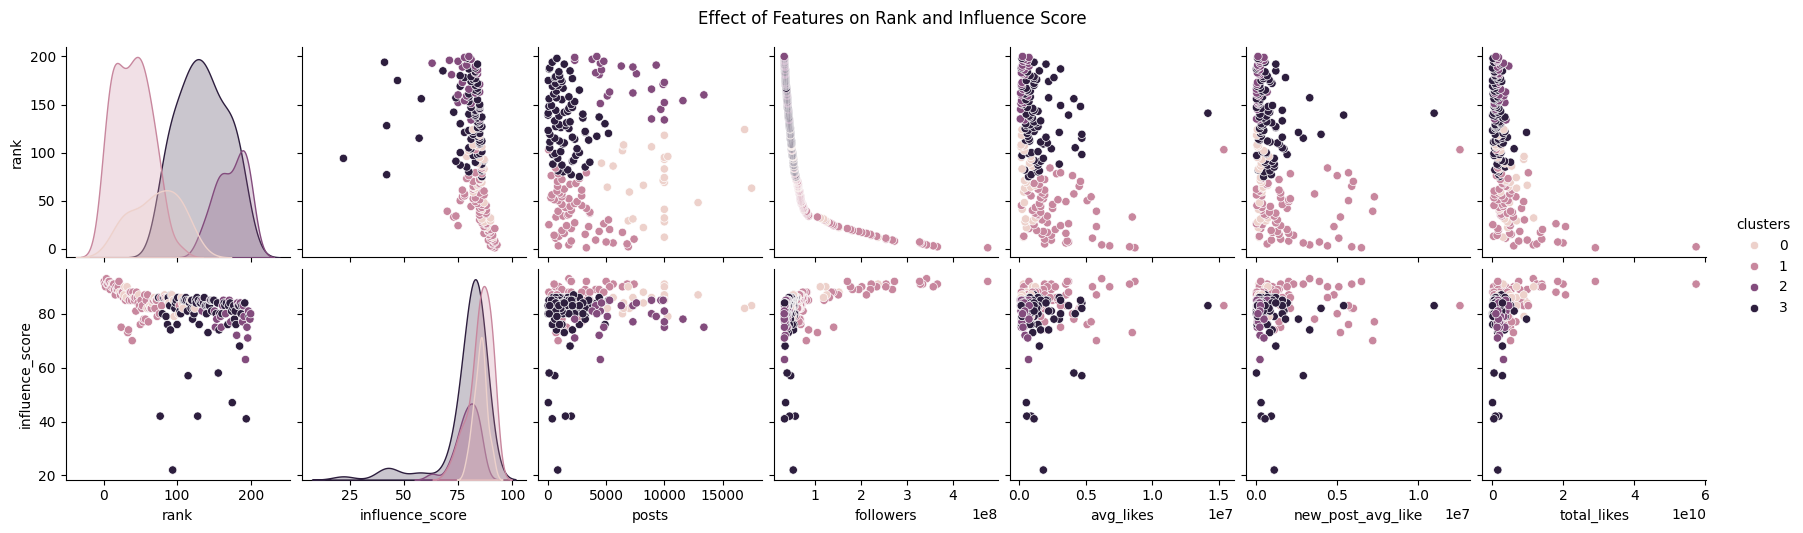

In [501]:
sb.pairplot(dataframe, y_vars=['rank', 'influence_score'], hue='clusters')
plt.suptitle('Effect of Features on Rank and Influence Score', y=1.05)
plt.show()